<a href="https://colab.research.google.com/github/ramya2628/image_denoising/blob/main/image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 119s 248ms/step - accuracy: 0.4974 - loss: 0.3912 - val_accuracy: 0.5040 - val_loss: 0.3142
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 242ms/step - accuracy: 0.5054 - loss: 0.3082 - val_accuracy: 0.5026 - val_loss: 0.3075
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 241ms/step - accuracy: 0.5067 - loss: 0.3032 - val_accuracy: 0.5039 - val_loss: 0.3038
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 246ms/step - accuracy: 0.5070 - loss: 0.3006 - val_accuracy: 0.5046 - val_loss: 0.3018
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 241ms/step - accuracy: 0.5064 - loss: 0.2992 - val_accuracy: 0.5041 - val_loss: 0.3012
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 241ms/step - accuracy: 0.5065 - loss: 0.2975 - val_accuracy: 0.5050 - val_loss: 0.2990
Epoch 7/10
469/469 ━

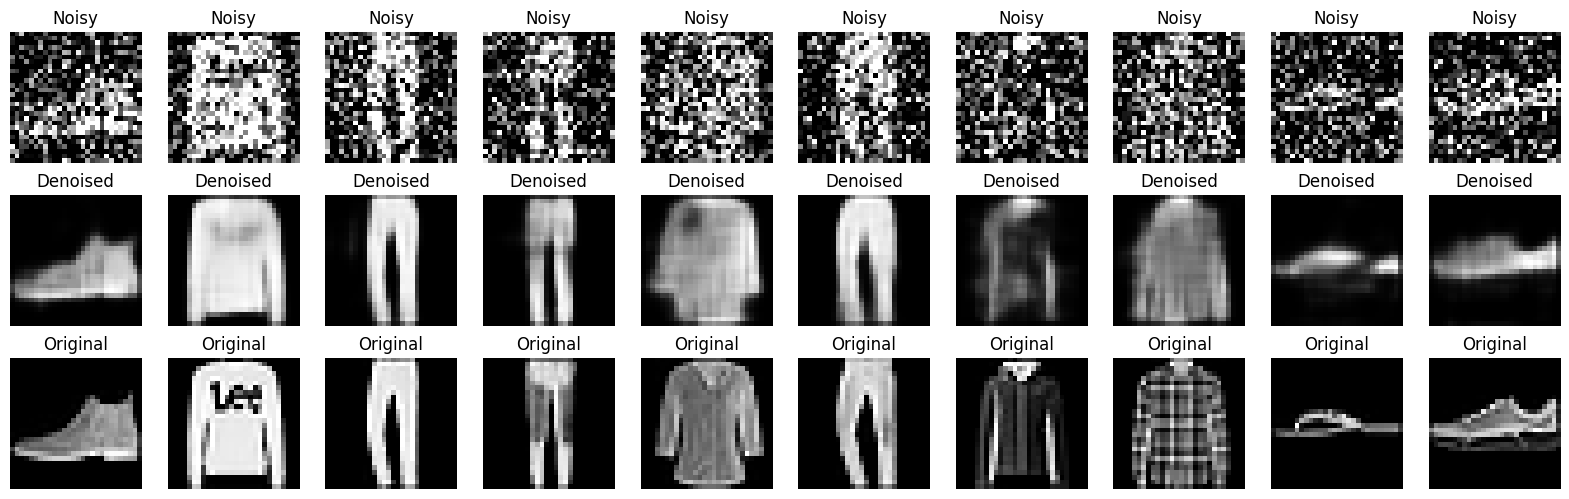

Training Accuracy: [0.5027115345001221, 0.5055837631225586, 0.5061357617378235, 0.506485104560852, 0.5067485570907593, 0.506935715675354, 0.5070726275444031, 0.5071845054626465, 0.5072758197784424, 0.507347822189331]
Validation Accuracy: [0.5040290355682373, 0.5026057958602905, 0.5038873553276062, 0.5046159625053406, 0.5041466951370239, 0.5050182938575745, 0.5049403309822083, 0.5051745772361755, 0.5050257444381714, 0.5050908923149109]


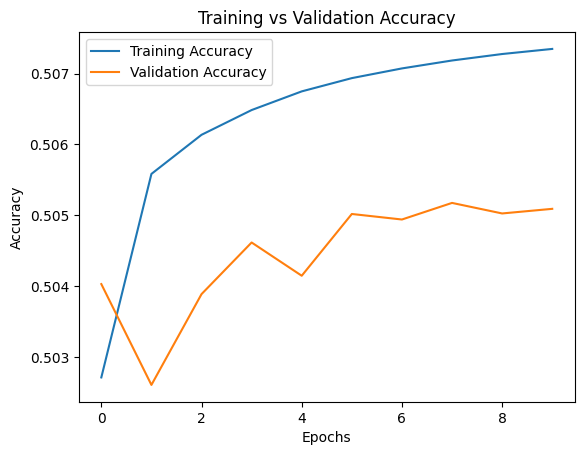

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Load Fashion-MNIST Dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data (0-1) and expand dimensions (for channels)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)   # shape: (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)     # shape: (10000, 28, 28, 1)

# 2. Add Gaussian Noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to maintain [0,1] range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. Build CNN Autoencoder Model
def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# 4. Train Model
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 5. Evaluate & Visualize Results
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Original
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.show()

# Print metrics
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()